In [1]:
import pandas as pd
import seaborn as sns
sns.set(context="notebook",style = "whitegrid")
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# 单变量线性回归

In [2]:
df = pd.read_csv('ex1data1.txt',names=['population','profit'])
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
df.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


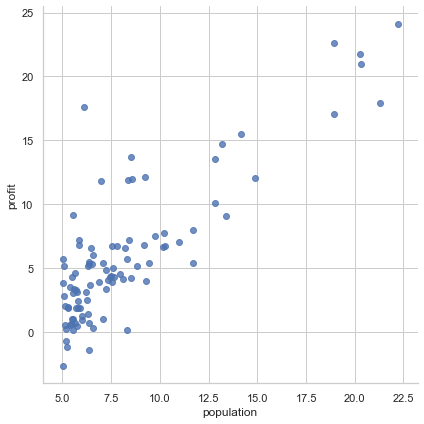

In [4]:
sns.lmplot('population','profit',df,height=6,fit_reg=False)
plt.show()

In [5]:
df.insert(0,'ones',1)

In [6]:
X = np.matrix(df.iloc[:,:-1].values) #取最后一列之前
Y = np.matrix(df.iloc[:,-1:].values)  #取最后一列

In [7]:
print(X.shape,type(X))
print(Y.shape,type(Y))

(97, 2) <class 'numpy.matrix'>
(97, 1) <class 'numpy.matrix'>


In [8]:
theta = np.matrix(np.array([0.,0.]))
print(theta.shape,type(theta))

(1, 2) <class 'numpy.matrix'>


In [9]:
def compute_cost(X,Y,theta):
    return np.sum(np.power(X*theta.T-Y,2))/(2*len(X))

In [10]:
compute_cost(X,Y,theta)

32.072733877455676

In [11]:
def gradient_descent(X,Y,theta,alpha,iters):
#     temp = np.matrix(np.zeros(theta.shape))
#     print(theta)
    paramenters = theta.shape[1]
    cost = np.zeros(iters)
    for i in range(iters):
#         print(theta)
        error = X*theta.T-Y
        for j in range(paramenters):
            term = error.T * X[:,j:]
            theta[0,j] = theta[0,j] - (alpha/len(X))*np.sum(term)
            
#         theta = temp
        cost[i] = compute_cost(X,Y,theta)
    return theta,cost

In [12]:
alpha = 0.02
iters = 2000

In [13]:
t,cost = gradient_descent(X,Y,theta,alpha,iters)

In [14]:
t

matrix([[-3.88919786,  1.19237244]])

In [15]:
cost

array([24.07646923, 17.22512051, 14.05759441, ...,  4.47697537,
        4.47697535,  4.47697532])

In [16]:
compute_cost(X,Y,t)

4.476975321254175

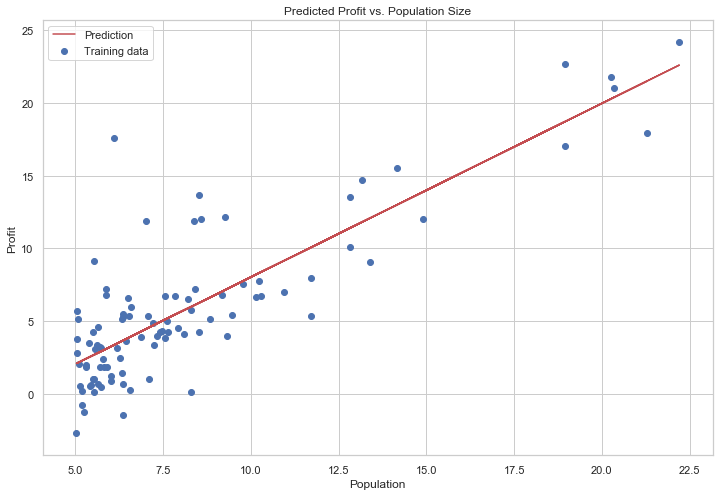

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df.population,df.population*t[0,1]+t[0,0],'r',label = "Prediction")
ax.scatter(df.population, df.profit, label="Training data")
plt.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

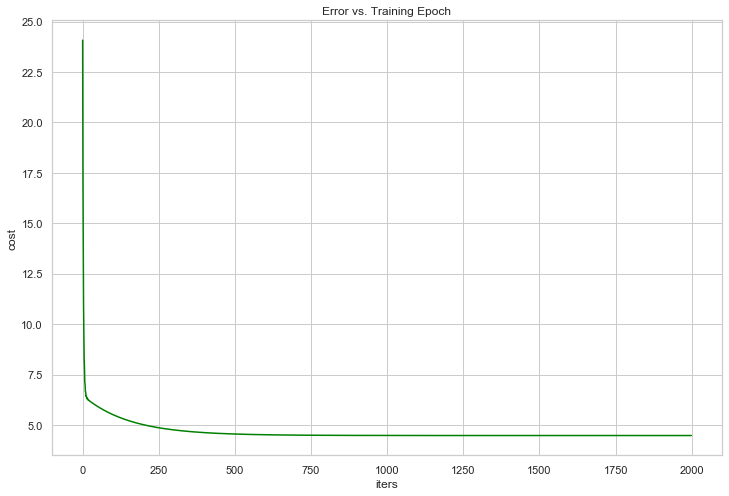

In [18]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost,'green')
ax.set_xlabel('iters')
ax.set_ylabel('cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

# 多变量线性回归

In [19]:
path =  'ex1data2.txt'
df2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
df2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [20]:
def normalize_feature(df):
    #特征缩放，每个减去平均值再除以标准差
    return df.apply(lambda column:(column-column.mean())/column.std()) 

In [21]:
df2 = normalize_feature(df2)
df2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [22]:
df2.insert(0,'ones',1)

In [23]:
X2 = np.matrix(df2.iloc[:,0:-1].values)
Y2 = np.matrix(df2.iloc[:,-1:].values)
print(X2.shape)
print(Y2.shape)

(47, 3)
(47, 1)


In [24]:
theta2 = np.matrix(np.array([0.,0.,0.]))
print(theta2.shape)

(1, 3)


In [25]:
compute_cost(X2,Y2,theta2)

0.48936170212765967

In [26]:
t2,cost2=gradient_descent(X2,Y2,theta2,alpha,iters)

In [27]:
t2

matrix([[ 9.81337611e-07,  8.84763674e-01, -5.31769575e-02]])

In [28]:
cost2

array([0.46516086, 0.44345597, 0.42398309, ..., 0.13068648, 0.13068648,
       0.13068648])

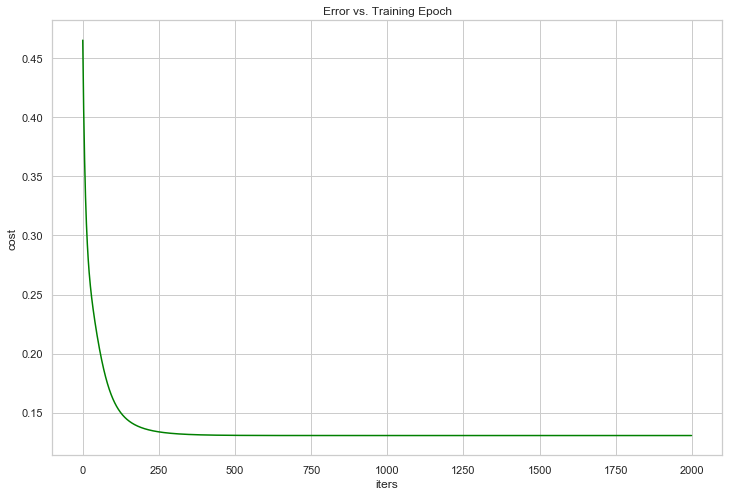

In [29]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost2,'green')
ax.set_xlabel('iters')
ax.set_ylabel('cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

# normal equation（正规方程）

In [30]:
def normal_equation(X,Y):
    theta = (X.T*X).I*X.T*Y
    return theta

In [31]:
theta3 = normal_equation(X,Y)
theta3

matrix([[-3.89578088],
        [ 1.19303364]])